In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

(512, 512, 3)


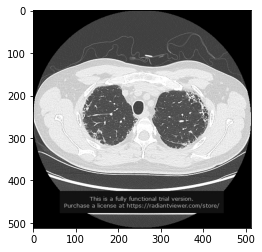

In [25]:
img=cv.imread("test/honeycombing/0100001.jpg")#转换成灰度图
print(img.shape)
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")


110.83156967163086
131.11468732330758
133.05322220198133
133.17135978253884
133.17135978253884


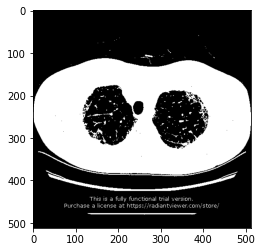

In [26]:
#全局阈值分割
meanGray=img.mean() #平均灰度值
ret,thresh=cv.threshold(img,meanGray,255,cv.THRESH_BINARY)
T=meanGray

result=[]
T_last=0
print(abs(T_last-T))
while abs(T_last-T)>0.1:
    T_last=T
    zero_value=0
    zero_num=0
    one_value=0
    one_num=0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if thresh[i,j]==0:
                zero_num+=1
                zero_value+=img[i,j]
            else:
                one_num+=1
                one_value+=img[i,j]

    T=((zero_value/zero_num)+(one_value/one_num))/2 #计算前景和背景的平均灰度

    meanGray=T
    print(meanGray)
    ret,thresh=cv.threshold(img,meanGray,255,cv.THRESH_BINARY)
    result.append(thresh)
plt.imshow(thresh,cmap="gray")

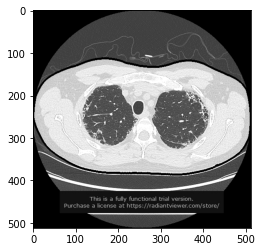

In [27]:
contours, hierarchy = cv.findContours(thresh,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
maxArea=0
maxContour=[]
index=0
for i in range(len(contours)):
    area = cv.contourArea(contours[i])
    if area>maxArea:
        maxArea=area
        maxContour=contours[i]

i=cv.drawContours(img, [maxContour], 0, (0,150,100), 3)
plt.imshow(i,cmap="gray")

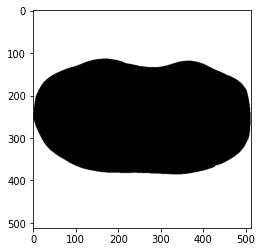

In [28]:
#判断点是否在最大连通区域轮廓内,制作掩模
mask=thresh.copy()
isIn=0
for i in range(thresh.shape[0]):
    for j in range(thresh.shape[1]):
        isIn=cv.pointPolygonTest(maxContour,(j,i),False)        
        if isIn==1:
            mask[i,j]=0
        else:
            mask[i,j]=255
    
    
plt.imshow(mask,cmap="gray")

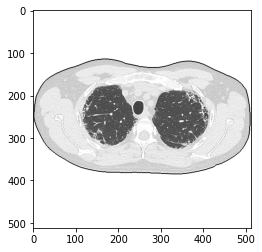

In [29]:
#提取中间的区域
extract=np.zeros((img.shape),np.uint8)
for i in range(thresh.shape[0]):
    for j in range(thresh.shape[1]):
        if mask[i,j]==0:
            extract[i,j]=img[i,j]
        else:
            extract[i,j]=255
            
plt.imshow(extract,cmap="gray")

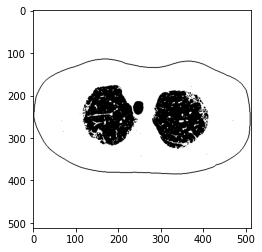

In [30]:
#取反
ret,thresh=cv.threshold(extract,127,255,cv.THRESH_BINARY)
result=~mask-thresh
plt.imshow(thresh,cmap="gray")

In [21]:
rect=(100,0,300,500)
img3=cv.cvtColor(extract,cv.COLOR_GRAY2RGB)
cv.grabCut(img3)

(512, 512, 3)